# Problem Statement
Understand the factors on which the demand for these shared bikes depends. Specifically, factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

# Reading & Understanding The Data

In [1]:
#Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# changing directory
os.chdir("C:\\Users\\deepi\\Desktop\\data science\\Machine Learning\\linear regression\\Assignment")

In [4]:
# Read the data & check the head of the dataset
boom_bike = pd.read_csv("day.csv")
boom_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# shape of dataset
boom_bike.shape

(730, 16)

In [6]:
# checking the data type and number of null values in dataset
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Observation
- we can observe that there is no null value present in the dataset.

In [7]:
# Name of the columns present in the dataset
boom_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# Making the column name more undersatandable
boom_bike.rename(columns={"yr":"year","mnth": "month", "temp": "temperature", "hum": "humidity", "cnt": "count"}, inplace= True)
boom_bike.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
# Statistical summary of data
boom_bike.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Observation
- We can observe that the categorical varibles are interpreted as numerical columns. Therfore, modification in the categorical data is required

In [10]:
# Modifying categorical data
boom_bike["season"] = boom_bike["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
boom_bike["month"] = boom_bike["month"].map({1:"jan", 2:"feb", 3: "mar", 4: "april", 5: "may", 6: "june", 7: "july", 8: "aug", 9: "sept", 10: "oct", 11: "nov", 12: "dec"})
boom_bike["weekday"] = boom_bike["weekday"].map({0:"sun", 1: "mon", 2:"tue", 3: "wed", 4: "thus", 5: "fri", 6:"sat"})
boom_bike["weathersit"] = boom_bike["weathersit"].map({1: "Clear", 2:"Mist + Cloudy", 3: "Light Snow", 4: "Heavy Rain"})

In [11]:
# Droping column 'instant' and 'dteday' (not required)
boom_bike.drop(["instant", "dteday"], 1, inplace= True)

# Visualization

### Visualization of Numerical Variables

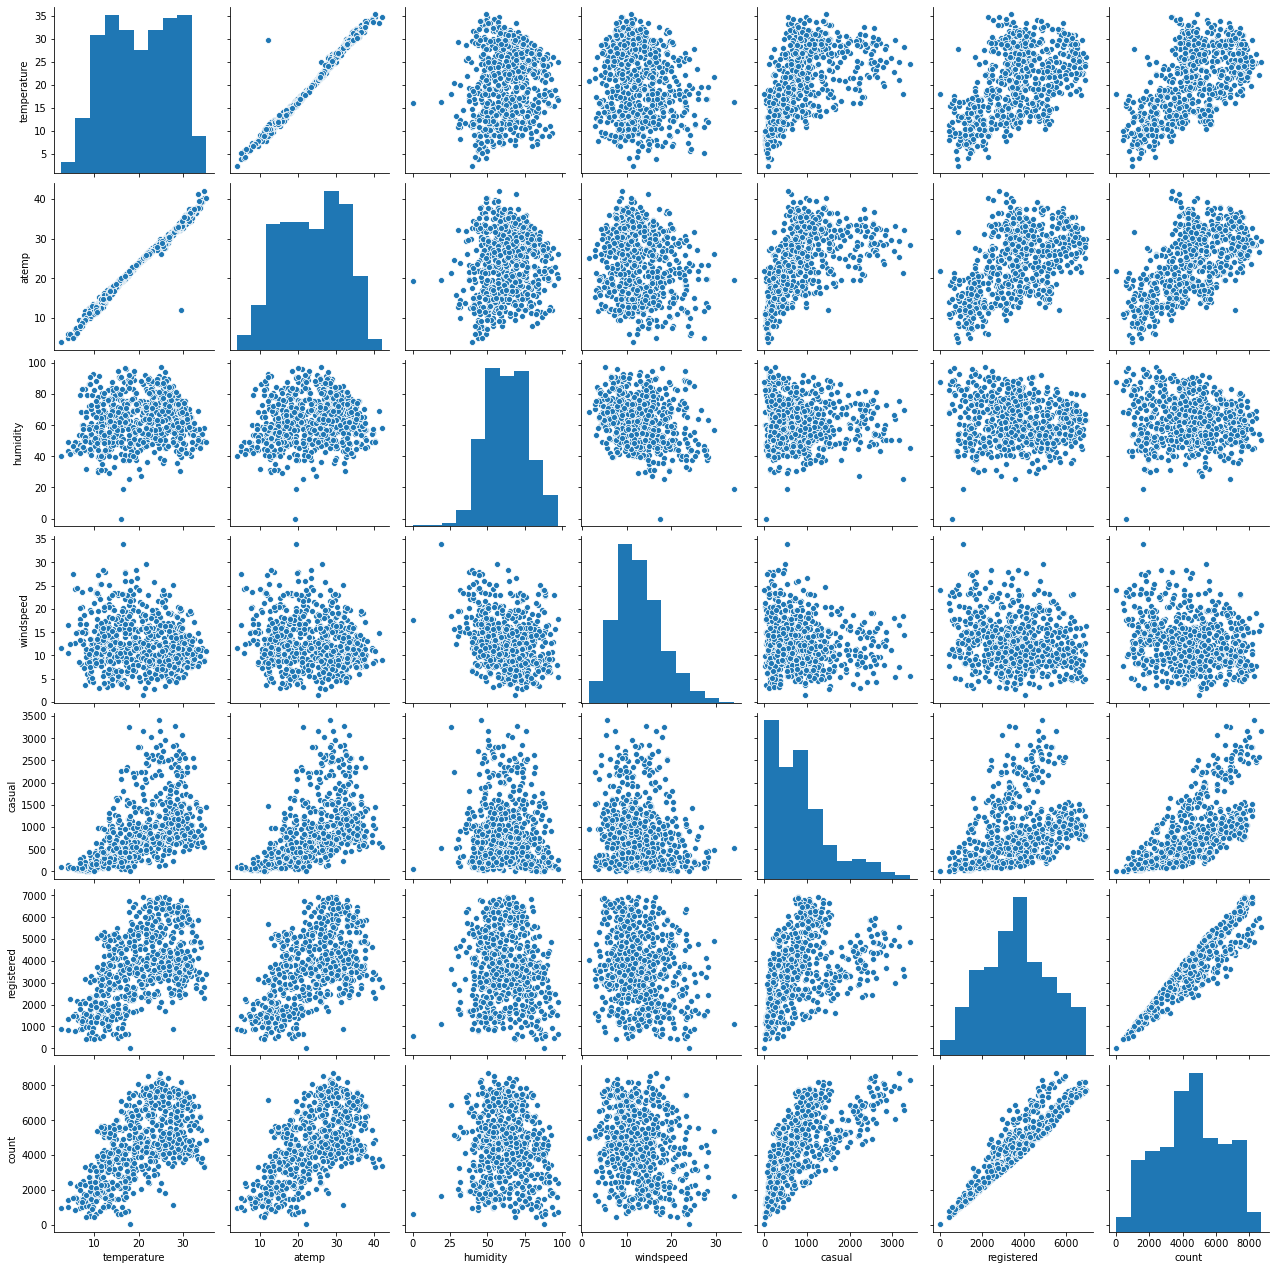

In [12]:
# Pairplot of all the numerical variables (to know the relation between them)
num_variable = ["temperature", "atemp", "humidity", "windspeed", "casual", "registered", "count"]
sns.pairplot(data = boom_bike, vars = num_variable)
plt.show()

##### Observations.
- From above pair plot we can observe that atemp and temperature variable are highly correalted.
- This is the case of multicollinearity therefore better to drop one of them.

In [13]:
# Drop atemp column to avoide multicollinearity
boom_bike.drop("atemp", 1, inplace= True)

In [14]:
# Dropping  casual and registered column since we can take only one variable as target variable
boom_bike.drop(["casual", "registered"], 1, inplace= True )

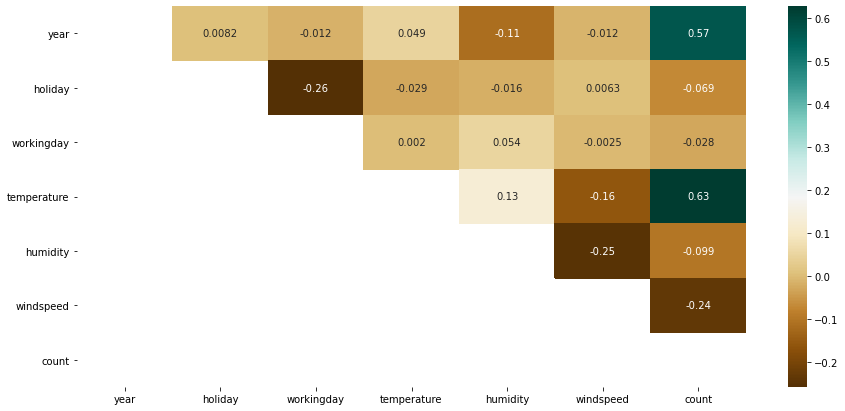

In [15]:
# Heatmap to observe correlation
mask = np.tril(np.ones_like(boom_bike.corr(), dtype= np.bool))
plt.figure(figsize =(15,7) )
sns.heatmap(data = boom_bike.corr(), annot= True, mask = mask, cmap = "BrBG" )
plt.show()

##### Observation
- Target variable 'count' has good correlation with 'temperature'. Therefore we can say that 'temperature' could be the important variable in building the linear model.
- Target variable 'count' has good correlation with 'year'. Therefore we can say that 'year' could be the important variable in building the linear model.

### Visualising Categorical Variables

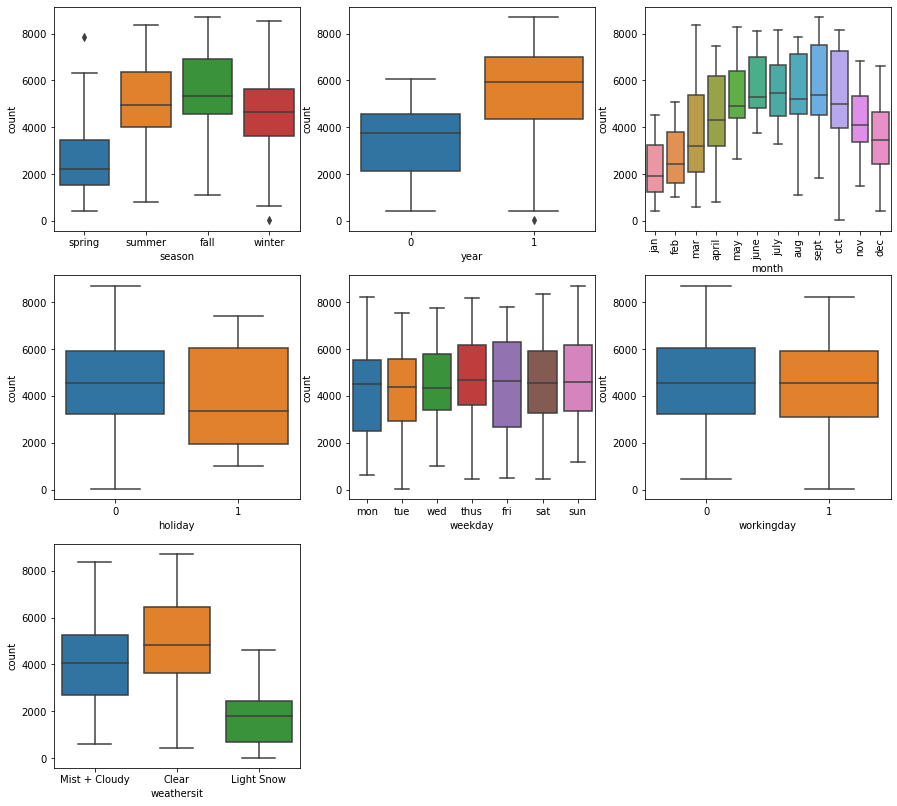

In [16]:
# Box plot between target variable 'count' and other categorical variables
cat_var = ["season", "year", "month", "holiday", "weekday", "workingday", "weathersit"]
plt.figure(figsize=(15,14))
plt.subplot(3,3,1)
sns.boxplot(x = "season", y = "count", data = boom_bike)

plt.subplot(3,3,2)
sns.boxplot(x = "year", y = "count", data = boom_bike)

plt.subplot(3,3,3)
sns.boxplot(x = "month", y = "count", data = boom_bike)
plt.xticks(rotation = 90)

plt.subplot(3,3,4)
sns.boxplot(x = "holiday", y = "count", data = boom_bike)

plt.subplot(3,3,5)
sns.boxplot(x = "weekday", y = "count", data = boom_bike)

plt.subplot(3,3,6)
sns.boxplot(x = "workingday", y = "count", data = boom_bike)

plt.subplot(3,3,7)
sns.boxplot(x = "weathersit", y = "count", data = boom_bike)

plt.show()

##### Observations
- Maximum bike rented in fall season and then in summer.
- Number of rented bikes increased in 2019 in comparison with 2018 data.
- Bike were rented maximum in the month of july.
- Bike rented during holidays are less.
- Maximum bikes were rented when the weather is clear, and due to light snow rented bike counts goes down.

# Data Preparation

In [17]:
# Dummy variable for categorical features
season = pd.get_dummies(boom_bike.season ,drop_first= True)
month = pd.get_dummies(boom_bike.month, drop_first= True)
weekday = pd.get_dummies(boom_bike.weekday, drop_first= True)
weathersit = pd.get_dummies(boom_bike.weathersit, drop_first= True)

In [18]:
# Concatination of the dummy variable data
dummy_var = pd.concat([season, month, weekday, weathersit], axis= 1)

In [19]:
# Concatination of the fianl dummy data with the boom_bike data
boom_bike = pd.concat([boom_bike, dummy_var], axis = 1)
boom_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,...,oct,sept,mon,sat,sun,thus,tue,wed,Light Snow,Mist + Cloudy
0,spring,0,jan,0,mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thus,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Drop columns
boom_bike.drop(["season", "month", "weekday", "weathersit"],1, inplace = True)

In [21]:
# head of the dataset
boom_bike.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,...,oct,sept,mon,sat,sun,thus,tue,wed,Light Snow,Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Shape of the dataset
boom_bike.shape

(730, 29)

## Spliting data into Train and Test data

In [23]:
#Spliting train and test data
boom_bike_train, boom_bike_test = train_test_split(boom_bike, train_size = 0.7, random_state = 100)

In [24]:
#Printing the shape of train and test data
print("Train_dataset_shape:", boom_bike_train.shape)
print("Test_dataset_shape:",boom_bike_test.shape)

Train_dataset_shape: (510, 29)
Test_dataset_shape: (220, 29)


## Scaling the data

In [25]:
# MinMax Scaler
Scaler = MinMaxScaler()

In [26]:
# Scaling independent numerical variable in train dataset
num_var = ["temperature", "humidity", "windspeed", "count"]
boom_bike_train[num_var] = Scaler.fit_transform(boom_bike_train[num_var])

In [27]:
# Statistical summary of scaled train data
boom_bike_train.describe()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,...,oct,sept,mon,sat,sun,thus,tue,wed,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Observation
- We can observe that scaling has been done perfectly as max value is 1 and min value is 0 for all the variables.

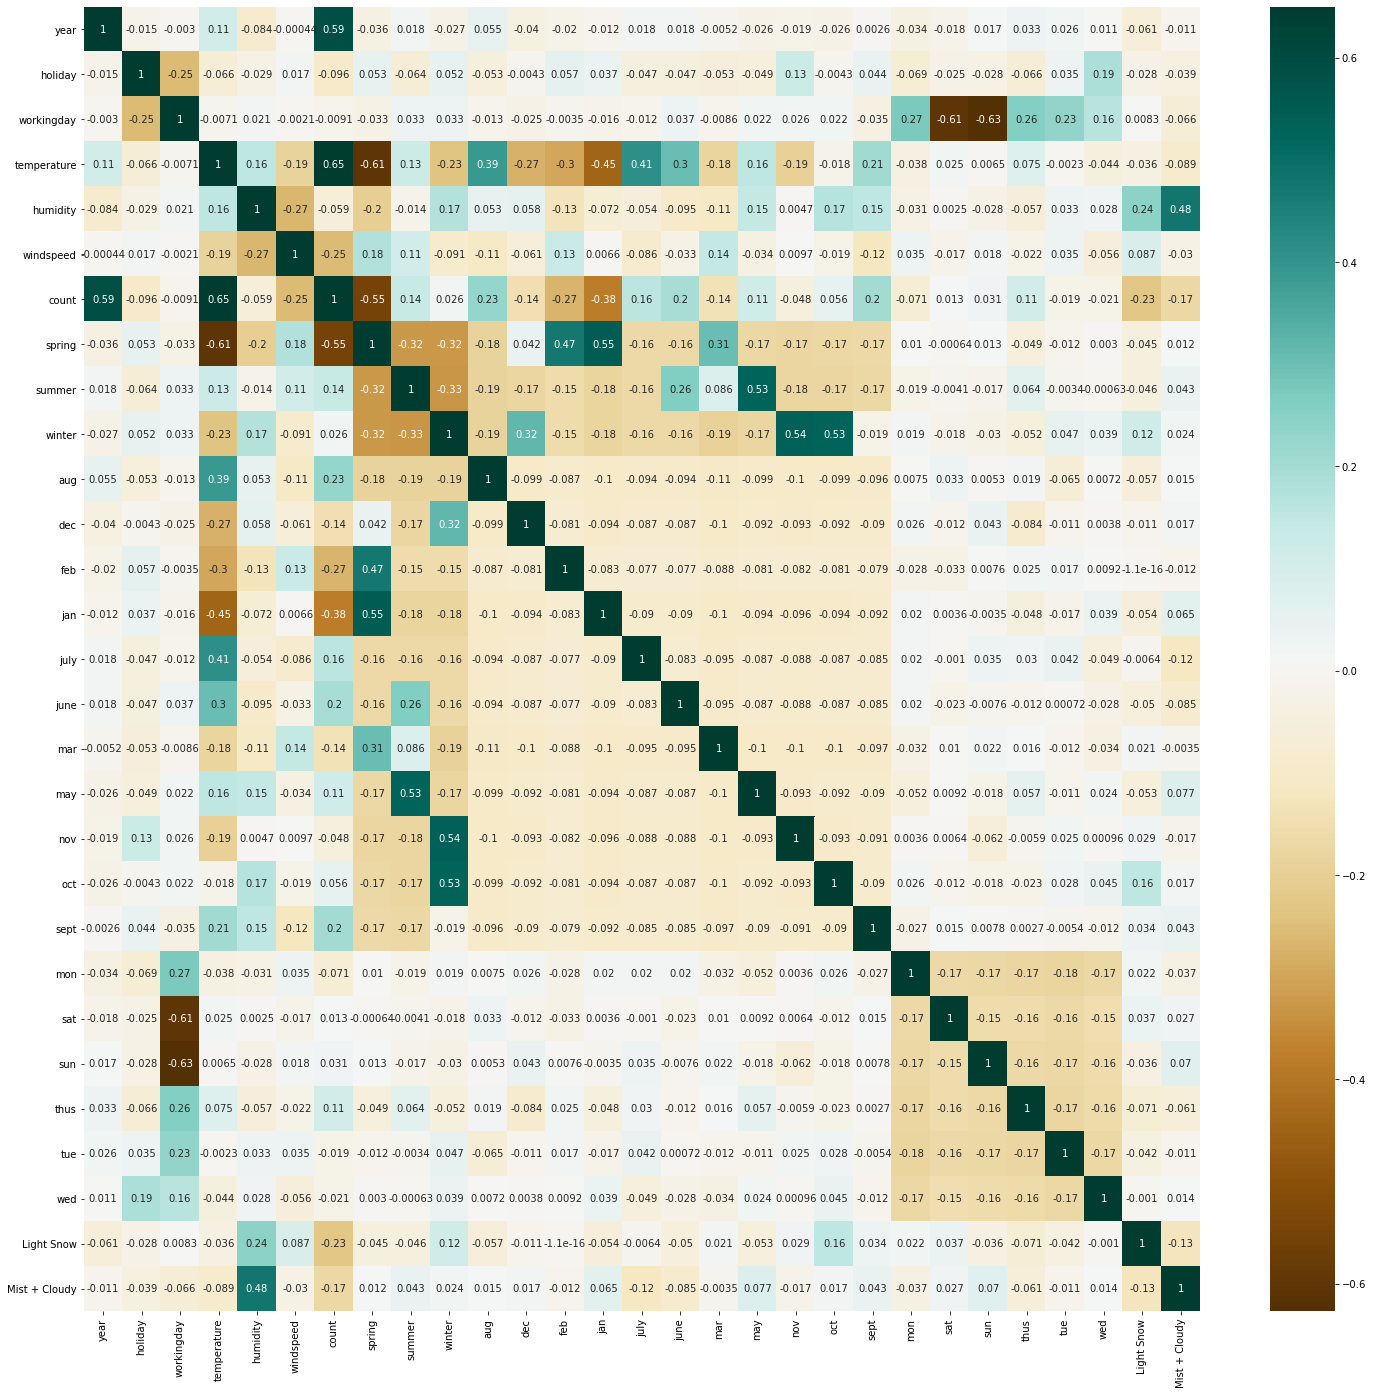

In [28]:
# check the correlation between variables
plt.figure(figsize =(25,24) )
sns.heatmap(data = boom_bike_train.corr(), annot= True, cmap = "BrBG", vmax = 0.65 )
plt.show()

#### Observation
- There is a positive high correlation between target variable i.e count with feature variables 'temperature' and 'year'
- There is a Negative high correlation between target variable i.e count with feature variables 'jan' and 'spring'
- Further we can observe the correation between independent variables and consider this to avoid multicolinearity.

# Model Building

In [29]:
# defining x and y
y_train = boom_bike_train.pop("count")
X_train = boom_bike_train

### Recursive Feature Elimination (RFE)

In [30]:
# elimination of variables using automated approach
# running RFE with the number of output 12 variables
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 12)
rfe = rfe.fit(X_train, y_train)


In [31]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 12),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 17),
 ('may', False, 11),
 ('nov', False, 3),
 ('oct', False, 15),
 ('sept', True, 1),
 ('mon', False, 10),
 ('sat', False, 7),
 ('sun', False, 8),
 ('thus', False, 16),
 ('tue', False, 9),
 ('wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [32]:
# list of 12 variables which are finalised by automated approch
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temperature', 'humidity', 'windspeed', 'spring',
       'summer', 'winter', 'july', 'sept', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [33]:
# creating dataset from RFE selected variables 
X_train_rfe = X_train[col]
X_train_rfe.head()

,year,holiday,temperature,humidity,windspeed,spring,summer,winter,july,sept,Light Snow,Mist + Cloudy
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,1


### Building Model Using Statsmodels

In [34]:
# Building 1st model by manual selection
# Add constant
X_train_rfe_lr_1 = sm.add_constant(X_train_rfe)

In [35]:
#Build 1st model and fit the model
lr_1 = sm.OLS(y_train, X_train_rfe_lr_1)
lr_model_1 = lr_1.fit()

In [36]:
#Statistical summary of 1st linear model
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.95e-190
Time:                        13:42:52   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2848      0.034      8.258      0.000       0.217       0.353
year              0.2294      0.008     28.208      0.000       0.213       0.245
holiday          -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temperature       0.5299      0.034     15.728      0.000       0.464       0.596
humidity         -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed        -0.1822      0.026     -7.074      0.000      -0.233      -0.132
spring           -0.0564      0.021     -2.700      0.007      -0.097      -0.015
summer            0.0531      0.015      3.536      0.000       0.024       0.083
winter            0.0976      0.017      5.643      0.000       0.064       0.132
july             -0.0572      0.018     -3.123      0.002      -0.093      -0.021
sept              0.0833      0.017      4.973      0.000       0.050       0.116
Light Snow       -0.2369      0.026     -8.983      0.000      -0.289      -0.185
Mist + Cloudy    -0.0527      0.010     -5.017      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Observation
- R squared and Adjusted R squared value is 0.842, 0.838 respectively which is a good value.
- p value of all the variables is < 0.05.
- probability of F statistics is almost equal to 0 that means overall model is statistically significant.
- However just by looking into R squared, Adjusted R squared and p values we can not suggest that model is a good fit. We should look into VIF values of feature variables.

In [37]:
# Check VIF values of feature variables in 1st linear model
vif = pd.DataFrame()
vif["Feature"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by = "VIF",ascending = False, inplace = True)
vif

,Feature,VIF
3,humidity,28.03
2,temperature,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.33
6,summer,2.79
11,Mist + Cloudy,2.28
0,year,2.08
8,july,1.58
9,sept,1.38


##### Observations
- 'humitidy' is having very high VIF value,therefore, insignificant. This is not at all exceptable for building a model

In [38]:
# Dropping varible with high VIF, drop "humidity"
X_train_rfe.drop("humidity", 1, inplace = True)

In [39]:
# Building 2nd linear model
# Add constant
X_train_rfe_lr_2 = sm.add_constant(X_train_rfe)

In [40]:
# Build 2nd model and fit the model
lr_2 = sm.OLS(y_train, X_train_rfe_lr_2)
lr_model_2 = lr_2.fit()

In [41]:
#Statistical summary of 2nd linear model
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          5.06e-187
Time:                        13:42:52   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746      0.000       0.141       0.258
year              0.2336      0.008     28.352      0.000       0.217       0.250
holiday          -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temperature       0.4910      0.033     14.770      0.000       0.426       0.556
windspeed        -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring           -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer            0.0465      0.015      3.051      0.002       0.017       0.076
winter            0.0817      0.017      4.730      0.000       0.048       0.116
july             -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sept              0.0768      0.017      4.517      0.000       0.043       0.110
Light Snow       -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist + Cloudy    -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Check VIF values of feature variables in 2nd linear model
vif_2= pd.DataFrame()
vif_2["Feature"] = X_train_rfe.columns
vif_2["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif_2["VIF"] = round(vif_2["VIF"], 2)
vif_2.sort_values(by = "VIF",ascending = False, inplace = True)
vif_2

,Feature,VIF
2,temperature,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
7,july,1.58
10,Mist + Cloudy,1.55
8,sept,1.34
9,Light Snow,1.08


##### Observation
- 'windspeed' variable is having high VIF value after temperature. Since, we know that temperature is an important feature in model building, therefore we will drop 'windspeed' column.

In [43]:
# Dropping varible with high VIF, drop "windspeed".
X_train_rfe.drop("windspeed", 1, inplace = True)

In [44]:
# Building 3rd linear model
# Add constant
X_train_rfe_lr_3 = sm.add_constant(X_train_rfe)

In [45]:
# Build 3rd  model and fit the model
lr_3 = sm.OLS(y_train, X_train_rfe_lr_3)
lr_model_3 = lr_3.fit()

In [46]:
# Statistical summary of 3rd linear model
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          5.71e-181
Time:                        13:42:53   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1501      0.029      5.124      0.000       0.093       0.208
year              0.2326      0.009     27.333      0.000       0.216       0.249
holiday          -0.1003      0.027     -3.721      0.000      -0.153      -0.047
temperature       0.5029      0.034     14.670      0.000       0.436       0.570
spring           -0.0766      0.022     -3.514      0.000      -0.119      -0.034
summer            0.0367      0.016      2.342      0.020       0.006       0.067
winter            0.0829      0.018      4.642      0.000       0.048       0.118
july             -0.0523      0.019     -2.715      0.007      -0.090      -0.014
sept              0.0812      0.018      4.623      0.000       0.047       0.116
Light Snow       -0.2989      0.025    -11.756      0.000      -0.349      -0.249
Mist + Cloudy    -0.0785      0.009     -8.669      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       66.927   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.674
Skew:                          -0.678   Prob(JB):                     1.74e-36
Kurtosis:                       5.431   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif_3 = pd.DataFrame()
vif_3["Feature"] = X_train_rfe.columns
vif_3["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif_3["VIF"] = round(vif_3["VIF"], 2)
vif_3.sort_values(by = "VIF",ascending = False, inplace = True)
vif_3

,Feature,VIF
2,temperature,4.22
0,year,2.06
4,summer,1.94
6,july,1.58
5,winter,1.57
9,Mist + Cloudy,1.55
3,spring,1.40
7,sept,1.34
8,Light Snow,1.07
1,holiday,1.04


##### Observation
- R-squared = 0.824 and Adjusted R squared = 0.820
- p value is less then 0.05 for all the variables.
- proababilty of F statistics is almost equal to zero. 
- VIF value of all the variables are less then 5
- Since VIF and p-value is in acceptable range, and R-squared and adjusted R squared value is good enough, therefore model is a good fit model

# Residual Analysis of Train Model

In [48]:
# calculate predicted value of dependent varibale based on final model.
y_train_pred = lr_model_3.predict(X_train_rfe_lr_3)

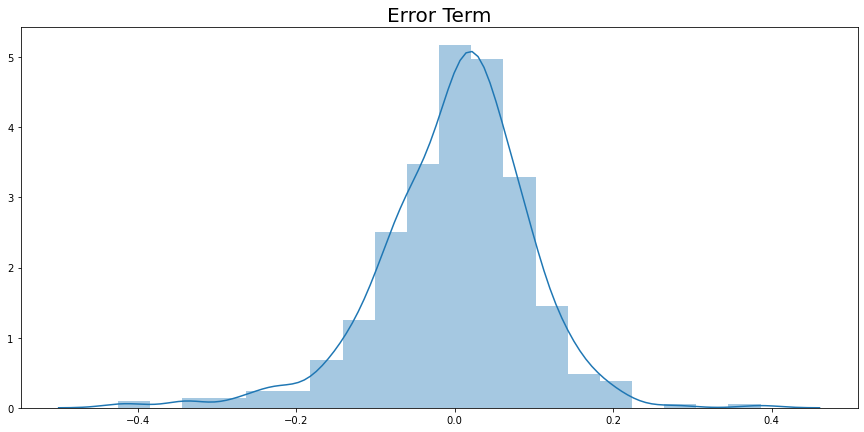

In [49]:
# Ploting Error term histogram
plt.figure(figsize=(15,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title("Error Term", fontdict={"fontsize": 20 })
plt.show()

#### Observation
- we can observe from above plot that error term is normally distributed with mean = 0. Therefore satisfying linear model assumption.

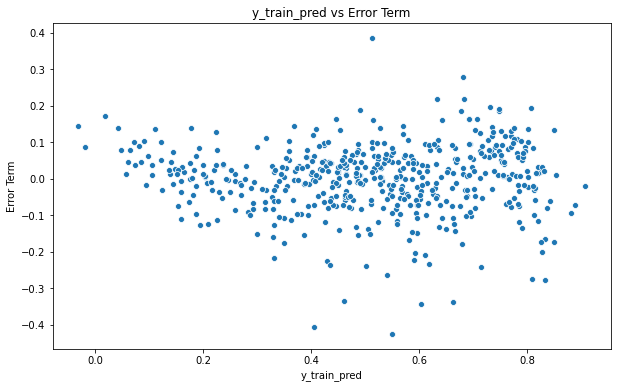

In [50]:
# Scatter plot between y_train_pred and error term
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_train_pred, y = (y_train - y_train_pred))
plt.xlabel("y_train_pred")
plt.ylabel("Error Term")
plt.title("y_train_pred vs Error Term")
plt.show();

##### Observation
- The varience of error terms seems to be increasing slightly for later observation.

# Making Prediction Using Final Model

In [51]:
# Scaling the test dataset
num_var = ["temperature", "humidity", "windspeed", "count"]
boom_bike_test[num_var] = Scaler.transform(boom_bike_test[num_var])

In [52]:
# Statistical summary of test data
boom_bike_test.describe()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,...,oct,sept,mon,sat,sun,thus,tue,wed,Light Snow,Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Defining X_test and y_test
y_test = boom_bike_test.pop("count")
X_test = boom_bike_test

In [54]:
# Selecting variables from X_test according to x_train final model dataset
variables = X_train_rfe.columns
X_test_3 = X_test[variables]

In [55]:
#Adding constant
X_test_lr_3 = sm.add_constant(X_test_3)

In [56]:
# Making Prediction using 3rd model
y_test_pred = lr_model_3.predict(X_test_lr_3)

## Model Evaluation

In [57]:
# Comparing r squared value of train and test dataset
print("R_squared_train_data:", r2_score(y_train,y_train_pred))
print("R_squared_test_data:", r2_score(y_test,y_test_pred))

R_squared_train_data: 0.8238197981422828
R_squared_test_data: 0.8092660294132242


#### Observation
- we can observe from above that there is no as such difference in R squared value of train and test dataset.
- Therefore we can say that our model is a good linear model 

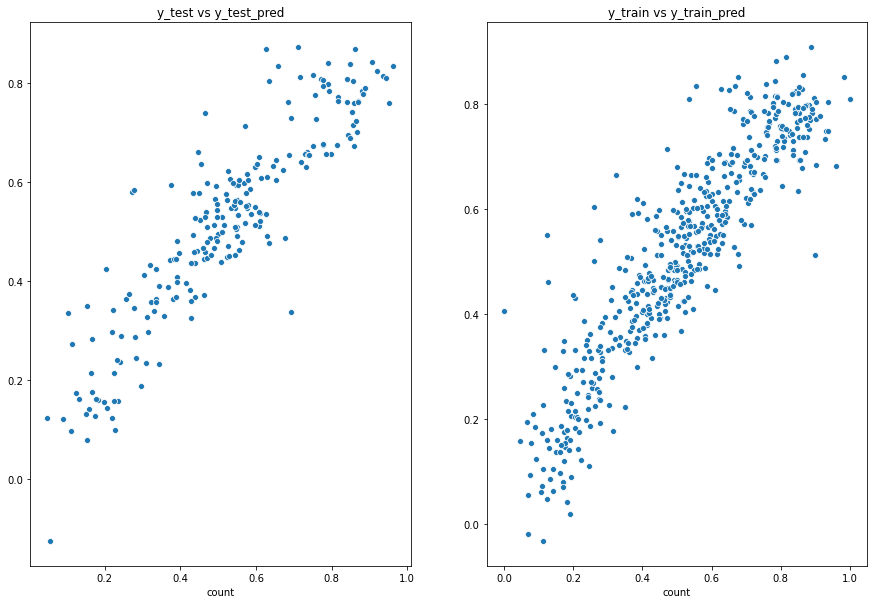

In [58]:
# To understand spread of the dataset
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.scatterplot(x = y_test, y = y_test_pred)
plt.title("y_test vs y_test_pred")

plt.subplot(1,2,2)
sns.scatterplot(x = y_train, y = y_train_pred)
plt.title("y_train vs y_train_pred")
plt.show()

##### Observations from the final linear model
- Equation of our best fit line is "0.1501 + 0.2326year - 0.1003holiday + 0.5029temperature - 0.0766spring + 0.0367summer + 0.0829winter - 0.0523july + 0.0812sept - 0.2989Light Snow - 0.0785(Mist + Cloudy)"

- overall we have a good model as R squared, Adjusted R squared are high enough and all the coefficients estimates are statistically significant. Also, in addition, the overall model is statistically significant in the very low p value obtained for the F-test

- Three most important variable according to the final model are 'temperature', 'year' and 'Light snow', with coefficient 0.5029, 0.2326 and -0.2989 respectively.

- 'temperature' variable is having the highest coefficient 0.5029 that means if temperature increases by 1 unit, rented bike counts will increase by 0.529

- Some of the variables in final model is having negative coefficient values, that means with increase in that variable value rented bike counts will go down.


# Conclusion
- BoomBikes should focus on varibale 'temperature' as temperature is is the most important factor in rented bikes count.
- Boombikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic only, since from data it is clear data rented bike count is incresed in 2019 when compared with 2018 rented bike data.
- Boombikes should also consider variables "summer", "winter", "september" and "holiday" since these variable also positively affects the rented bikes count.
- Varibales "spring", "july", "Light Snow" and "Mist+Cloudy" is having negative effect on rented bike counts. Therefore Boombikes should try to improve some policy regarding renting bikes in these cases for instance plan for some attractive offers to improve rented bike counts.